In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from itertools import combinations
from scipy.stats import ttest_ind
import students_functions as sf
from sklearn.model_selection import train_test_split
import missingno as msno
import pandas_profiling 

pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 50) # выведем больше колонок

students = pd.read_csv('stud_math.csv')
RANDOM_SEED = 12

In [2]:
sf.quantiles_info(students.age)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


In [6]:
students.age.min()

15

In [64]:
display(students.head(10))

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   
5        yes     yes                 -6.0    yes      yes       no     5.0   
6         no     yes                 -6.0    yes      yes       no     4.0   
7         no     yes                 -6.0    yes       no       no     4.0   
8         no     yes                 -6.0    yes      yes       no     NaN   
9        yes     yes                 -6.0    yes      yes       no     5.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0  
5       4.0    2.0     5.0      10.0   75.0  
6       4.0    4.0     3.0       0.0   55.0  
7       1.0    4.0     1.0       6.0   30.0  
8       2.0    2.0     1.0       0.0   95.0  
9       5.0    1.0     5.0       0.0   75.0

In [4]:
students.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Let's rename the columns 

In [57]:
display(students.head(10))

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   
5        yes     yes                 -6.0    yes      yes       no     5.0   
6         no     yes                 -6.0    yes      yes       no     4.0   
7         no     yes                 -6.0    yes       no       no     4.0   
8         no     yes                 -6.0    yes      yes       no     NaN   
9        yes     yes                 -6.0    yes      yes       no     5.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0  
5       4.0    2.0     5.0      10.0   75.0  
6       4.0    4.0     3.0       0.0   55.0  
7       1.0    4.0     1.0       6.0   30.0  
8       2.0    2.0     1.0       0.0   95.0  
9       5.0    1.0     5.0       0.0   75.0

In [7]:
students.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   school                    395 non-null    object 
 1   sex                       395 non-null    object 
 2   age                       395 non-null    int64  
 3   area                      378 non-null    object 
 4   family_size               368 non-null    object 
 5   parents_status            350 non-null    object 
 6   mother_education          392 non-null    float64
 7   father_education          371 non-null    float64
 8   mother_job                376 non-null    object 
 9   father_job                359 non-null    object 
 10  school_choosing_reason    378 non-null    object 
 11  guardian                  364 non-null    object 
 12  travel_time               367 non-null    float64
 13  study_time                388 non-null    float64
 14  failures  

In [4]:
print(f'There are {students.isnull().any().sum()} columns in students dataset with missing values.')

There are 27 columns in students dataset with missing values.


Let's check which column and how many missing values we have 

In [58]:
size = len(students)
students.isnull().sum().apply(lambda x: round(x * 100 / size, 2))

school                  0.00
sex                     0.00
age                     0.00
address                 4.30
famsize                 6.84
Pstatus                11.39
Medu                    0.76
Fedu                    6.08
Mjob                    4.81
Fjob                    9.11
reason                  4.30
guardian                7.85
traveltime              7.09
studytime               1.77
failures                5.57
schoolsup               2.28
famsup                  9.87
paid                   10.13
activities              3.54
nursery                 4.05
studytime, granular     1.77
higher                  5.06
internet                8.61
romantic                7.85
famrel                  6.84
freetime                2.78
goout                   2.03
health                  3.80
absences                3.04
score                   1.52
dtype: float64

Есть только 3 значения без пропусков : age , sghool и sex 

Заменим все NaN значения на самые распространенные 

In [59]:
nan_columns = list(students.columns[students.isnull().sum() > 0])
if nan_columns:
    for nan_column in nan_columns:
        most_frequent = students[nan_column].value_counts().index[0]
        students[nan_column] = students[nan_column].apply(lambda x: most_frequent if pd.isna(x) else x)
        
   

Переименуем столбцы для более удобного использования

In [62]:
students.columns = [
    'school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','studytime,granular','higher','internet','romantic','famrel','freetime','goout','health','absences','score']


In [22]:
display(students.head(10))

school sex  age area family_size parents_status  mother_education  \
0     GP   F   18    U         GT3              A               4.0   
1     GP   F   17    U         GT3              T               1.0   
2     GP   F   15    U         LE3              T               1.0   
3     GP   F   15    U         GT3              T               4.0   
4     GP   F   16    U         GT3              T               3.0   
5     GP   M   16    U         LE3              T               4.0   
6     GP   M   16    U         LE3              T               2.0   
7     GP   F   17    U         GT3              A               4.0   
8     GP   M   15    U         LE3              A               3.0   
9     GP   M   15    U         GT3              T               3.0   

   father_education mother_job father_job school_choosing_reason guardian  \
0               4.0    at_home    teacher                 course   mother   
1               1.0    at_home      other                 course   father   
2               1.0    at_home      other                  other   mother   
3               2.0     health      other                   home   mother   
4               3.0      other      other                   home   father   
5               3.0   services      other             reputation   mother   
6               2.0      other      other                   home   mother   
7               4.0      other    teacher                   home   mother   
8               2.0   services      other                   home   mother   
9               4.0      other      other                   home   mother   

   travel_time  study_time  failures schools_support family_support  \
0          2.0         2.0       0.0             yes             no   
1          1.0         2.0       0.0              no            yes   
2          1.0         2.0       3.0             yes             no   
3          1.0         3.0       0.0              no            yes   
4          1.0         2.0       0.0              no            yes   
5          1.0         2.0       0.0              no            yes   
6          1.0         2.0       0.0              no             no   
7          2.0         2.0       0.0             yes            yes   
8          1.0         2.0       0.0              no            yes   
9          1.0         2.0       0.0              no            yes   

  paid_classes activities nursery_past  studytime, granular  \
0           no         no          yes                 -6.0   
1           no         no           no                 -6.0   
2           no         no          yes                 -6.0   
3          yes        yes          yes                 -9.0   
4          yes         no          yes                 -6.0   
5          yes        yes          yes                 -6.0   
6           no         no          yes                 -6.0   
7           no         no          yes                 -6.0   
8          yes         no          yes                 -6.0   
9          yes        yes          yes                 -6.0   

  high_education_objective home_internet romantic_relations  family_relations  \
0                      yes           yes                 no               4.0   
1                      yes           yes                 no               5.0   
2                      yes           yes                 no               4.0   
3                      yes           yes                yes               3.0   
4                      yes            no                 no               4.0   
5                      yes           yes                 no               5.0   
6                      yes           yes                 no               4.0   
7                      yes            no                 no               4.0   
8                      yes           yes                 no               4.0   
9                      yes           yes                 no               5.0   

   f

In [3]:
object_columns = [s for s in students.columns if students[s].dtypes == 'object']

students = pd.get_dummies(students, columns=object_columns, dummy_na=True)



In [4]:
students.head(10)

age  Medu  Fedu  traveltime  studytime  failures  studytime, granular  \
0   18   4.0   4.0         2.0        2.0       0.0                 -6.0   
1   17   1.0   1.0         1.0        2.0       0.0                 -6.0   
2   15   1.0   1.0         1.0        2.0       3.0                 -6.0   
3   15   4.0   2.0         1.0        3.0       0.0                 -9.0   
4   16   3.0   3.0         1.0        2.0       0.0                 -6.0   
5   16   4.0   3.0         1.0        2.0       0.0                 -6.0   
6   16   2.0   2.0         1.0        2.0       0.0                 -6.0   
7   17   4.0   4.0         2.0        2.0       0.0                 -6.0   
8   15   3.0   2.0         1.0        2.0       0.0                 -6.0   
9   15   3.0   4.0         1.0        2.0       0.0                 -6.0   

   famrel  freetime  goout  health  absences  score  school_GP  school_MS  \
0     4.0       3.0    4.0     3.0       6.0   30.0          1          0   
1     5.0       3.0    3.0     3.0       4.0   30.0          1          0   
2     4.0       3.0    2.0     3.0      10.0   50.0          1          0   
3     3.0       2.0    2.0     5.0       2.0   75.0          1          0   
4     4.0       3.0    2.0     5.0       4.0   50.0          1          0   
5     5.0       4.0    2.0     5.0      10.0   75.0          1          0   
6     4.0       4.0    4.0     3.0       0.0   55.0          1          0   
7     4.0       1.0    4.0     1.0       6.0   30.0          1          0   
8     NaN       2.0    2.0     1.0       0.0   95.0          1          0   
9     5.0       5.0    1.0     5.0       0.0   75.0          1          0   

   school_nan  sex_F  sex_M  sex_nan  address_R  address_U  address_nan  \
0           0      1      0        0          0          1            0   
1           0      1      0        0          0          1            0   
2           0      1      0        0          0          1            0   
3           0      1      0        0          0          1            0   
4           0      1      0        0          0          1            0   
5           0      0      1        0          0          1            0   
6           0      0      1        0          0          0            1   
7           0      1      0        0          0          1            0   
8           0      0      1        0          0          1            0   
9           0      0      1        0          0          1            0   

   famsize_GT3  famsize_LE3  famsize_nan  ...  guardian_nan  schoolsup_no  \
0            0            0            1  ...             0             0   
1            1            0            0  ...             0             1   
2            0            1            0  ...             0             0   
3            1            0            0  ...             0             1   
4            1            0            0  ...             0             1   
5            0            1            0  ...             0             1   
6            0            1            0  ...             0             1   
7            1            0            0  ...             0             0   
8            0            1            0  ...             0             1   
9            0            0            1  ...             0             1   

   schoolsup_yes  schoolsup_nan  famsup_no  famsup_yes  famsup_nan  paid_no  \
0              1              0          1           0           0        1   
1              0              0          0           1           0        1   
2              1              0          1           0           0        0   
3              0              0          0           1           0        0   
4              0              0          0           1           0        0   
5              0              0          0           1           0        0   
6              0              0          1           0           0        1   
7           

#### students.info()

## Analysis

Начнем проверку со значения информации о котором и нас нет: 

### studytime, granular

Судя по названию оно имеет отношение к study_time.Проверим:

In [24]:
students['studytime, granular'].corr(students['study_time'])

-1.0

Корреляция –1 указывает на идеальную отрицательную корреляцию, что означает, что когда одна переменная возрастает, другая
понижается.Таким  образом ,  нет смысла использовать два идентичных значения.Удалим его

In [25]:
students.drop(['studytime, granular'], inplace = True, axis = 1)

##### Далее разберем по порядку все последующие  значения 

### school 

In [30]:
students.school.value_counts(dropna=False, normalize=True)

GP    0.883544
MS    0.116456
Name: school, dtype: float64

In [31]:
students[['school', 'score']].groupby(by=['school']).mean()

score
school           
GP      52.593123
MS      49.456522

Большая часть учиться в школе GP, где средний балл выше, чем в MS

### sex

In [26]:
students.sex.value_counts(dropna=False, normalize=True)

F    0.526582
M    0.473418
Name: sex, dtype: float64

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

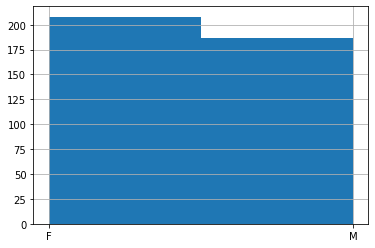

In [28]:
students.sex.hist(bins = len(students.sex.value_counts()))
students.sex.describe()

In [29]:
students[['sex', 'score']].groupby(by=['sex']).mean()

score
sex           
F    50.096154
M    54.598930

Можно увидеть , что девочек немного больше ,чем мальчиков ,чей средний балл выше.

### age

Распределение выглядит следующим образом 

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

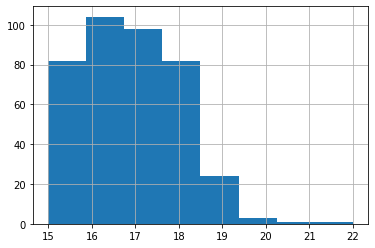

In [33]:
students.age.hist(bins = len(students.age.value_counts()))
students.age.describe()

In [40]:
quantiles_info(students.age)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Половина учеников находятся в возрасте  от 16 до 18 лет. Несмотря на то,что в данных указан интервал от 13 до 22 лет , по формуле IQR получается ,что 22 года -это housing[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));выброс .

### address

In [46]:
students.address.value_counts(dropna=False, normalize=True)

U    0.789873
R    0.210127
Name: address, dtype: float64

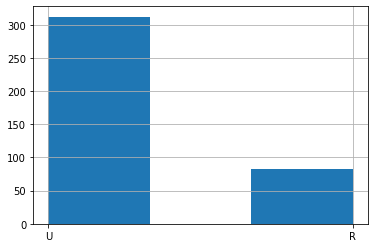

In [47]:
students.address.hist(bins=3)

Очевидно , что большая часть живет в городе 

### family_size

In [63]:
students.family_size.value_counts(dropna=False, normalize=True)

AttributeError: 'DataFrame' object has no attribute 'family_size'

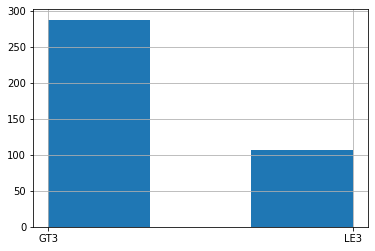

In [51]:
students.famsize.hist(bins=3)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(students.drop(['score'],axis=1), 
                                                     students.score, 
                                                     test_size=0.2, 
                                                     random_state=RANDOM_SEED)

In [12]:
X_train

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
64      GP   F   15       U     LE3       T   4.0   3.0  services  services   
144     GP   M   17       U     GT3       T   2.0   1.0     other     other   
131     GP   F   15       U     GT3     NaN   1.0   1.0   at_home     other   
139     GP   F   15       U     GT3     NaN   4.0   4.0   teacher   teacher   
295     GP   M   17       U     GT3       T   3.0   3.0    health     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
241     GP   M   17     NaN     LE3       A   4.0   4.0   teacher     other   
253     GP   M   16       R     NaN       T   2.0   1.0     other     other   
390     MS   M   20       U     LE3       A   2.0   2.0  services  services   
155     GP   M   15       R     GT3       T   2.0   3.0   at_home  services   
331     GP   F   17       R     GT3       T   2.0   4.0   at_home     other   

         reason guardian  traveltime  studytime  failures schoolsup famsup  \
64   reputation   father         1.0        2.0       0.0       yes     no   
144        home      NaN         1.0        1.0       3.0        no    yes   
131      course   mother         3.0        1.0       0.0        no    yes   
139      course   mother         2.0        1.0       0.0        no     no   
295        home   mother         1.0        1.0       0.0        no    yes   
..          ...      ...         ...        ...       ...       ...    ...   
241      course   mother         NaN        2.0       0.0        no    yes   
253      course   mother         2.0        1.0       0.0        no     no   
390      course      NaN         1.0        2.0       2.0        no    yes   
155      course   mother         1.0        2.0       0.0       yes     no   
331      course      NaN         1.0        3.0       0.0        no    yes   

    paid activities nursery  studytime, granular higher internet romantic  \
64    no        yes     yes                 -6.0    yes      yes      yes   
144   no         no     yes                 -3.0    yes      yes       no   
131   no        yes      no                 -3.0    yes      yes      yes   
139   no        yes     yes                 -3.0    yes      yes      NaN   
295  yes         no     yes                 -3.0    yes      yes       no   
..   ...        ...     ...                  ...    ...      ...      ...   
241  yes         no     yes                 -6.0    yes      yes       no   
253  NaN        yes      no                 -3.0    yes       no       no   
390  yes         no     yes                 -6.0    yes       no       no   
155  yes        yes     yes                 -6.0    yes      NaN      NaN   
331   no         no     yes                 -9.0    NaN      yes      yes   

     famrel  freetime  goout  health  absences  
64      4.0       4.0    4.0     2.0       0.0  
144     5.0       4.0    5.0     5.0       0.0  
131     4.0       NaN    3.0     4.0       0.0  
139     4.0       3.0    2.0     5.0       0.0  
295     4.0       4.0    3.0     5.0       4.0  
..      ...       ...    ...     ...       ...  
241     3.0       3.0    NaN     4.0       2.0  
253     3.0       3.0    2.0     3.0       0.0  
390     5.0       5.0    4.0     4.0     212.0  
155     4.0       4.0    4.0     1.0       2.0  
331     4.0       4.0    3.0     5.0       7.0  

[316 rows x 29 columns]

In [13]:
X_test

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
236     GP   M   17       U     LE3       T   2.0   NaN     other     other   
348     GP   F   17     NaN     GT3       T   4.0   3.0    health     other   
81      GP   M   15       U     GT3     NaN   2.0   3.0     other     other   
1       GP   F   17       U     GT3     NaN   1.0   1.0   at_home     other   
343     GP   F   17       U     GT3       A   2.0   2.0   at_home   at_home   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
71      GP   M   15       U     GT3       T   4.0   2.0     other     other   
376     MS   F   20     NaN     GT3       T   4.0   2.0    health     other   
43      GP   M   15       U     GT3       T   2.0   2.0  services  services   
206     GP   F   16       U     GT3       A   3.0   1.0  services     other   
262     GP   M   18       R     GT3       T   3.0   2.0     other     other   

         reason guardian  traveltime  studytime  failures schoolsup famsup  \
236        home   father         1.0        2.0       NaN        no     no   
348  reputation   mother         NaN        3.0       0.0        no    yes   
81         home      NaN         1.0        3.0       0.0       yes     no   
1        course   father         1.0        2.0       0.0        no    yes   
343        home   father         1.0        2.0       1.0        no    yes   
..          ...      ...         ...        ...       ...       ...    ...   
71       course   mother         1.0        4.0       0.0        no     no   
376      course      NaN         2.0        3.0       2.0        no    yes   
43       course   father         1.0        1.0       0.0       yes    yes   
206      course   mother         1.0        2.0       3.0        no    yes   
262      course   mother         1.0        3.0       0.0        no     no   

    paid activities nursery  studytime, granular higher internet romantic  \
236  NaN        yes      no                 -6.0    yes      yes      yes   
348  yes        yes     yes                 -9.0    yes      yes      yes   
81   NaN        NaN      no                 -9.0    yes      yes       no   
1     no         no      no                 -6.0    yes      yes       no   
343   no         no     yes                 -6.0    yes      yes      yes   
..   ...        ...     ...                  ...    ...      ...      ...   
71    no         no     yes                -12.0    yes      yes       no   
376  yes         no      no                 -9.0    yes      yes      yes   
43    no        NaN     yes                 -3.0    yes      yes       no   
206  yes         no     yes                 -6.0    yes      yes       no   
262   no        yes      no                 -9.0    yes       no       no   

     famrel  freetime  goout  health  absences  
236     4.0       4.0    2.0     NaN       4.0  
348     NaN       4.0    3.0     4.0       0.0  
81      5.0       3.0    2.0     5.0       4.0  
1       5.0       3.0    3.0     3.0       4.0  
343     3.0       3.0    1.0     4.0       0.0  
..      ...       ...    ...     ...       ...  
71      3.0       3.0    3.0     3.0       0.0  
376     5.0       4.0    3.0     3.0       4.0  
43      NaN       4.0    1.0     1.0       0.0  
206     2.0       3.0    3.0     4.0       5.0  
262     5.0       3.0    2.0     3.0       1.0  

[79 rows x 29 columns]

In [3]:
numeric_features = students.select_dtypes(include=[np.number])
numeric_features.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'studytime, granular', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'score'],
      dtype='object')

In [4]:
categorical_features = students.select_dtypes(include='object')
categorical_features.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

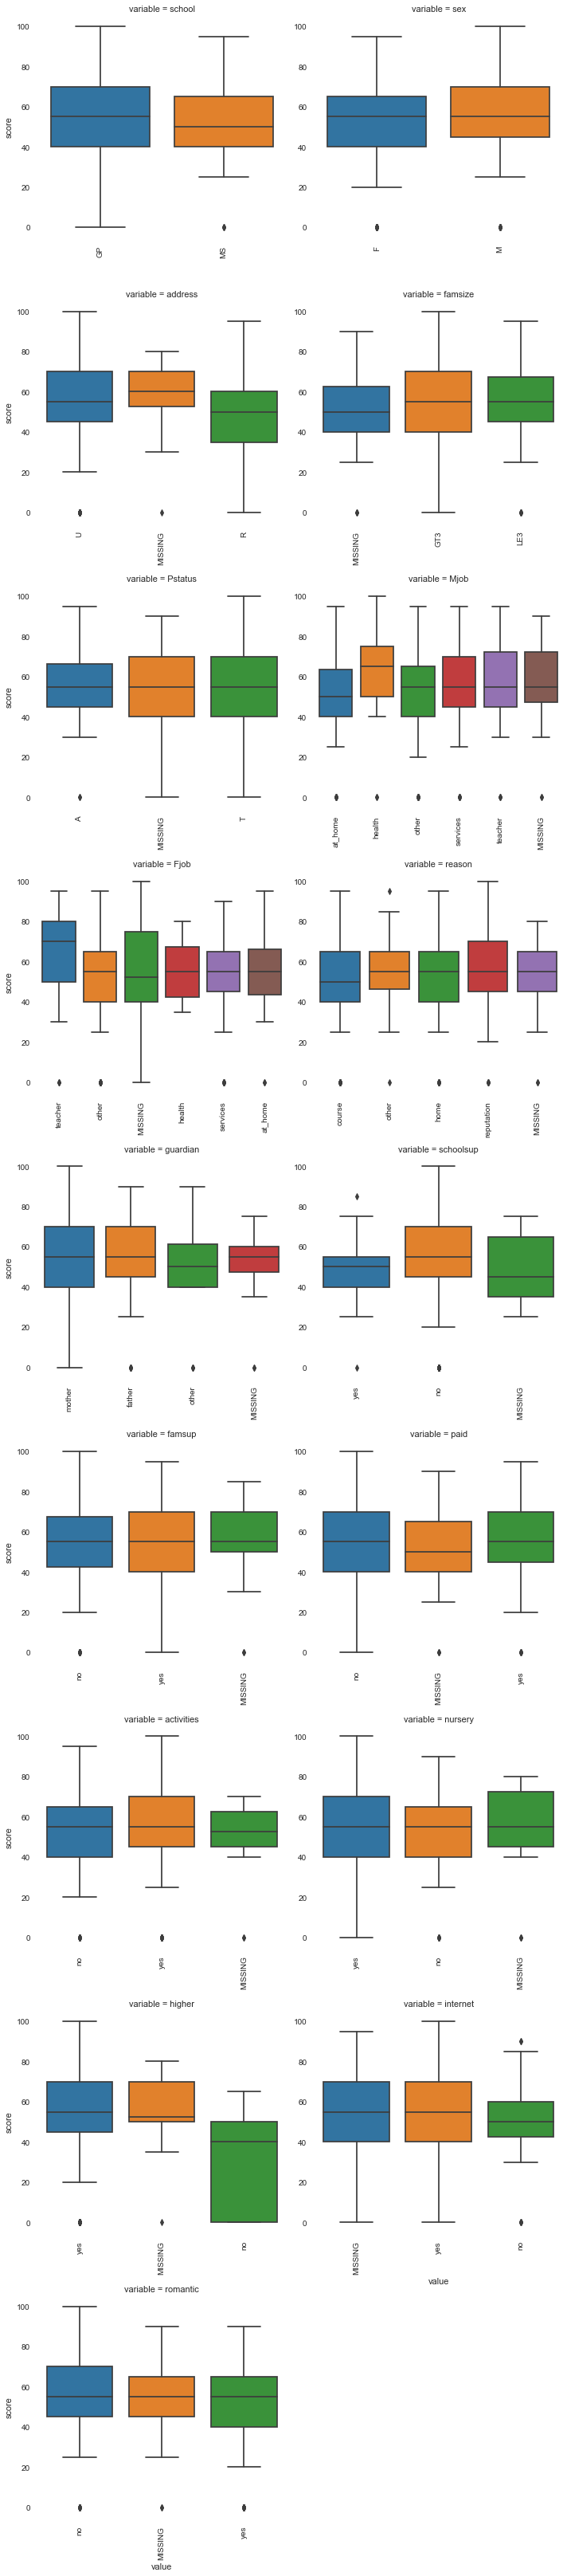

In [28]:
for c in categorical_features:
    students[c] = students[c].astype('category')
    if students[c].isnull().any():
        students[c] = students[c].cat.add_categories(['MISSING'])
        students[c] = students[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(students, id_vars=['score'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "score")

In [29]:
discrete_feature=[feature for feature in numeric_features if len(students[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 12


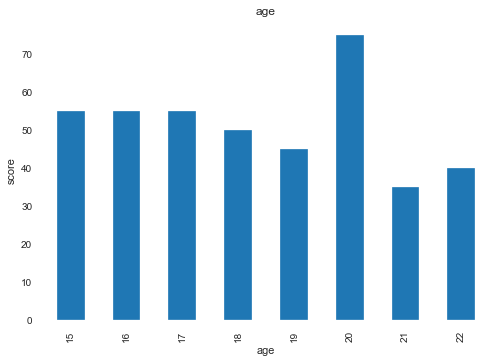

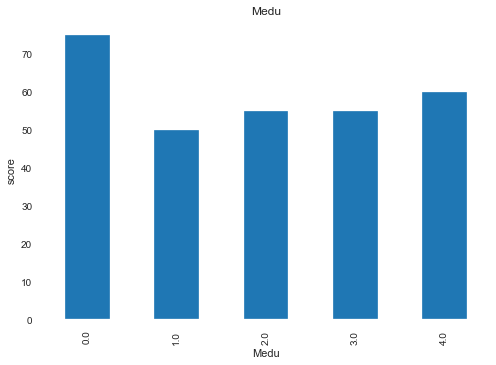

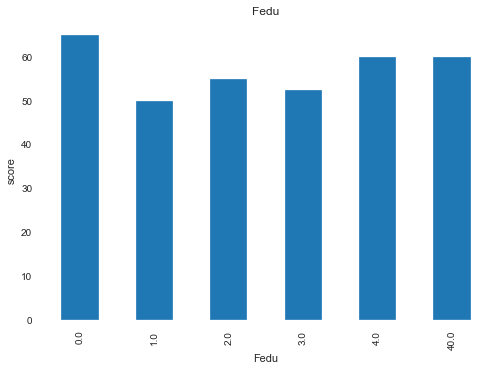

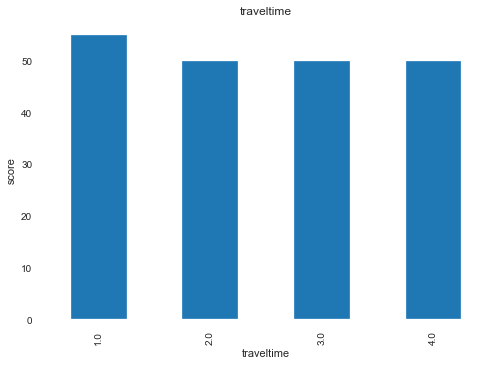

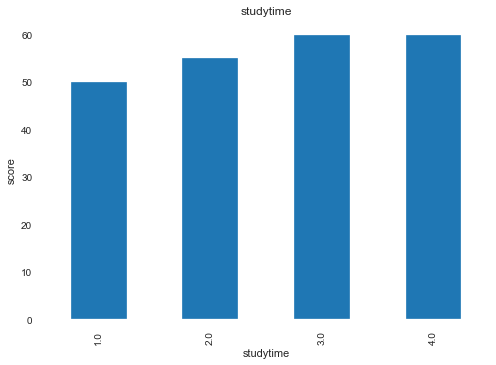

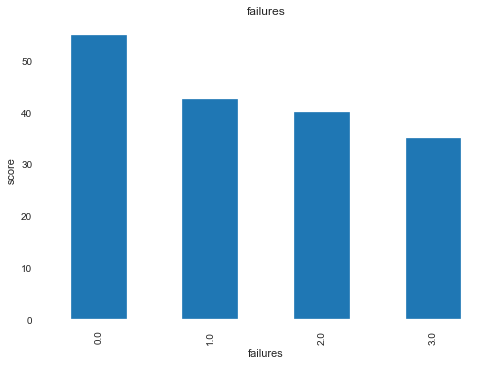

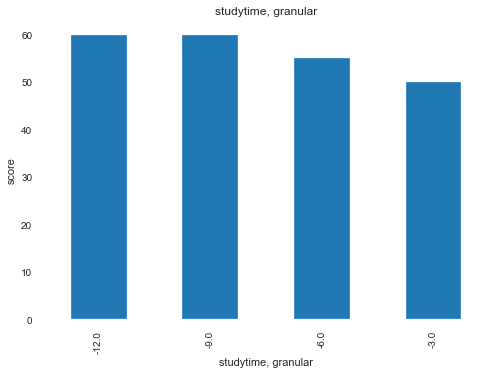

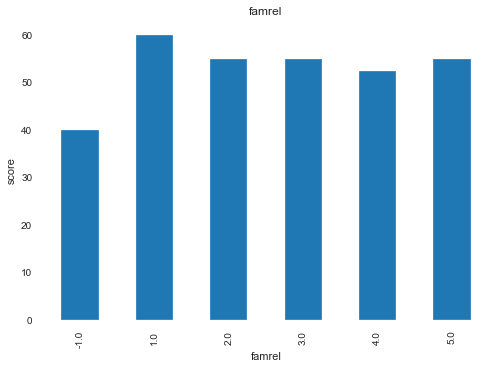

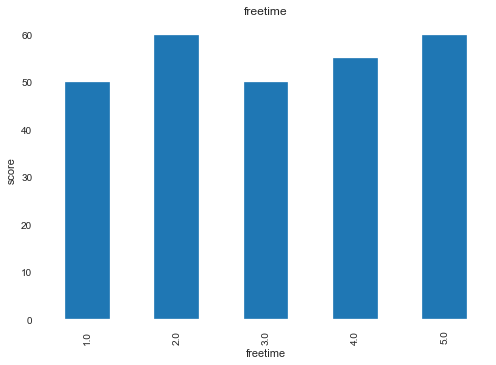

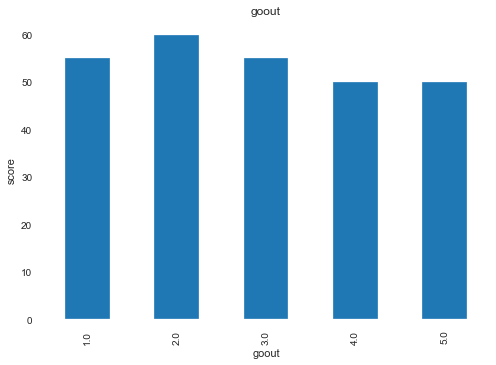

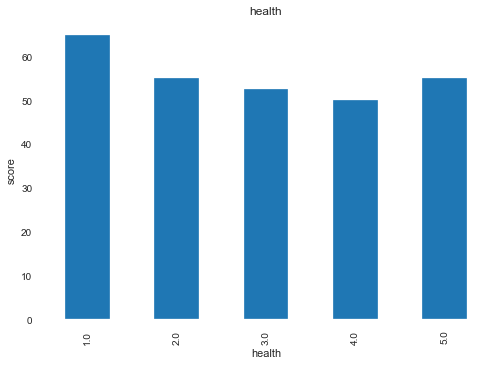

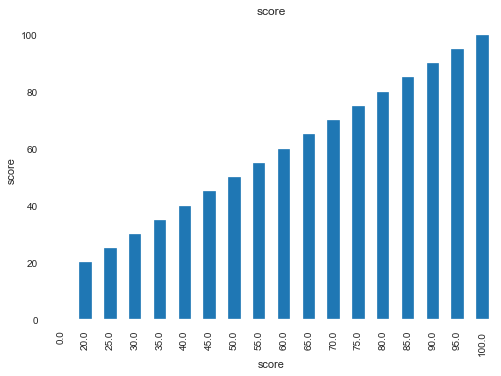

In [30]:
for feature in discrete_feature:
    data=students.copy()
    data.groupby(feature)['score'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('score')
    plt.title(feature)
    plt.show()

In [17]:
numeric_features.head()

age  Medu  Fedu  traveltime  studytime  failures  studytime, granular  \
0   18   4.0   4.0         2.0        2.0       0.0                 -6.0   
1   17   1.0   1.0         1.0        2.0       0.0                 -6.0   
2   15   1.0   1.0         1.0        2.0       3.0                 -6.0   
3   15   4.0   2.0         1.0        3.0       0.0                 -9.0   
4   16   3.0   3.0         1.0        2.0       0.0                 -6.0   

   famrel  freetime  goout  health  absences  score  
0     4.0       3.0    4.0     3.0       6.0   30.0  
1     5.0       3.0    3.0     3.0       4.0   30.0  
2     4.0       3.0    2.0     3.0      10.0   50.0  
3     3.0       2.0    2.0     5.0       2.0   75.0  
4     4.0       3.0    2.0     5.0       4.0   50.0

In [19]:
for feature in discrete_feature:
    data=students.copy()
    students.groupby(feature)['score'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('score')
    plt.title(feature)
    plt.show()

NameError: name 'discrete_feature' is not defined

In [ ]:
discrete_feature=[feature for feature in numeric_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

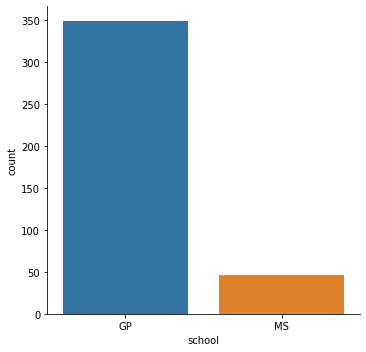

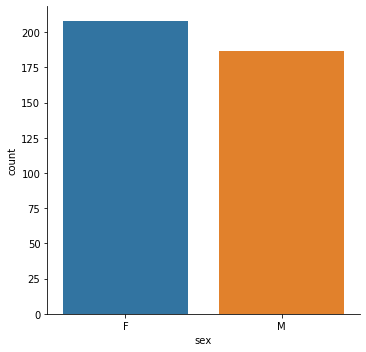

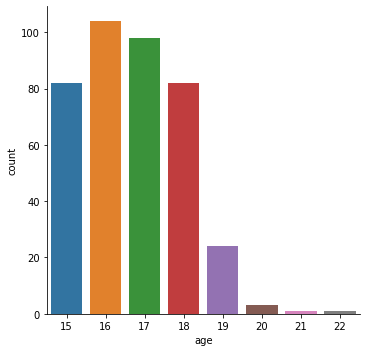

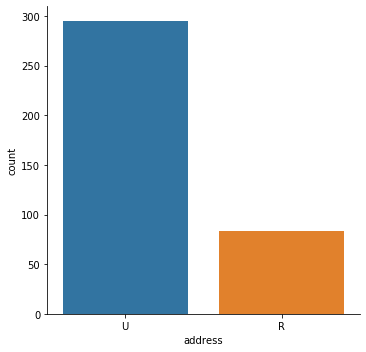

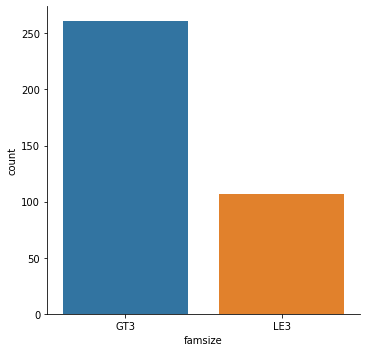

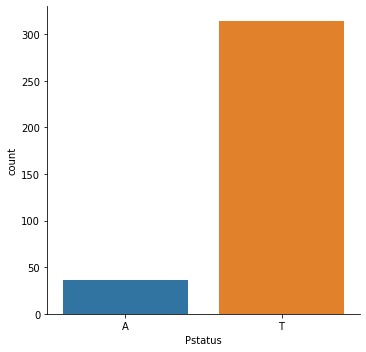

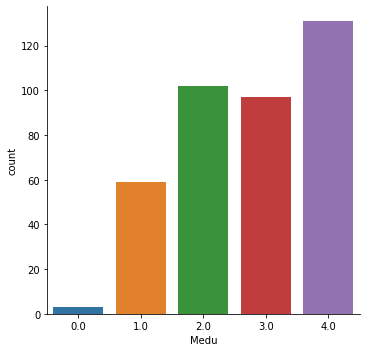

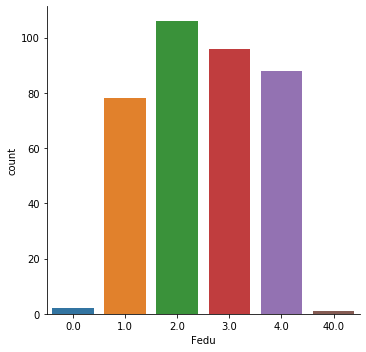

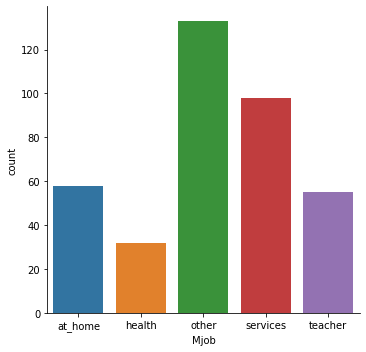

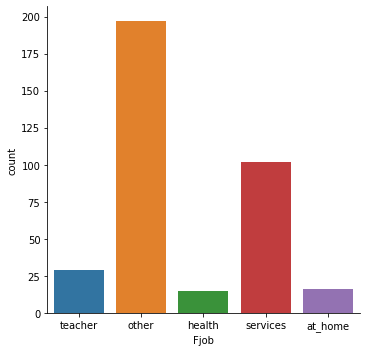

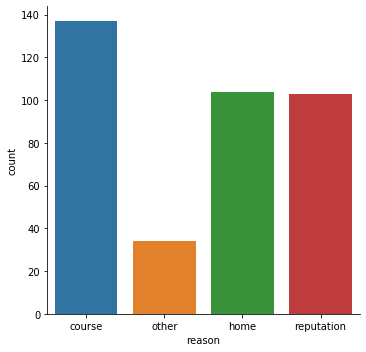

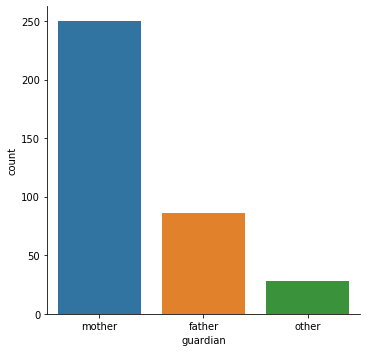

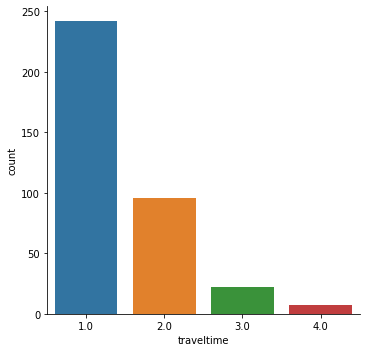

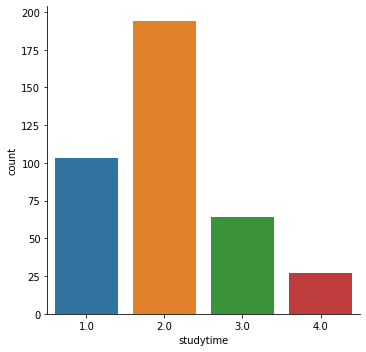

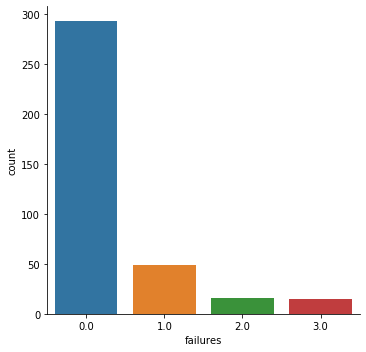

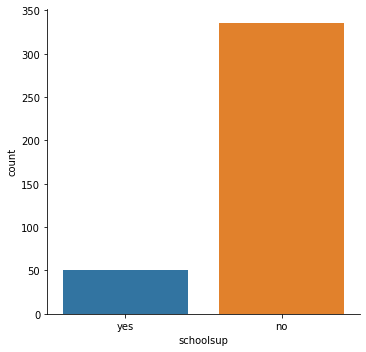

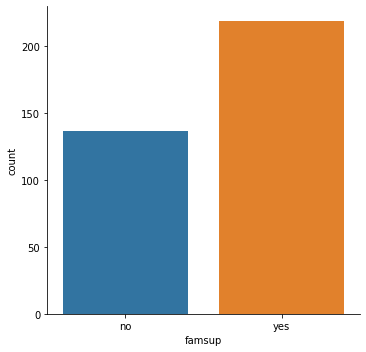

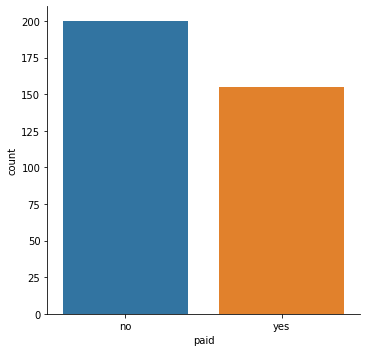

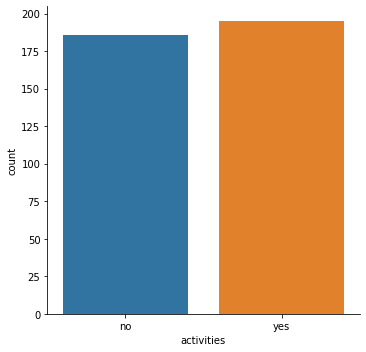

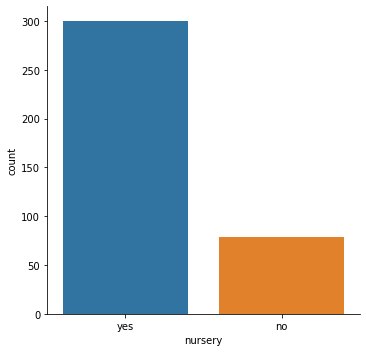

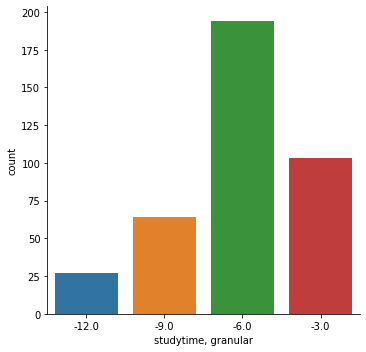

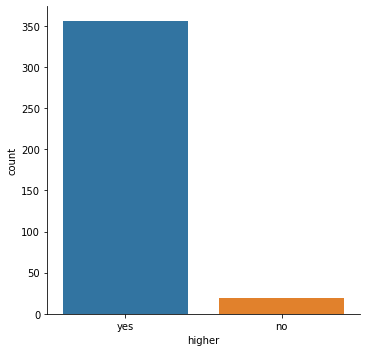

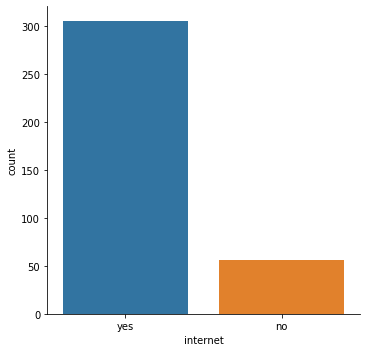

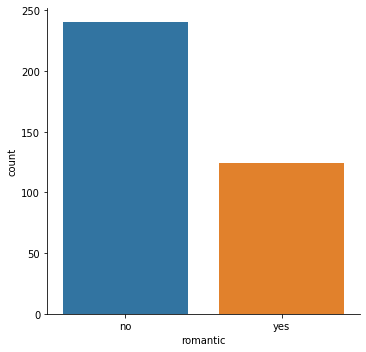

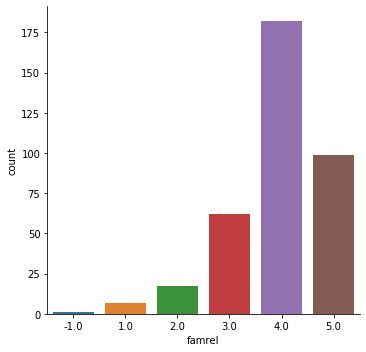

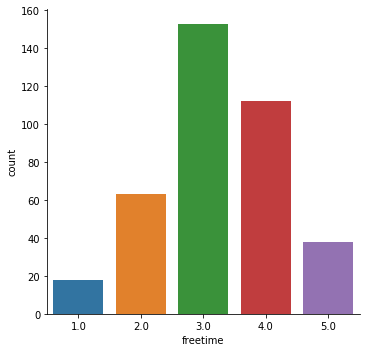

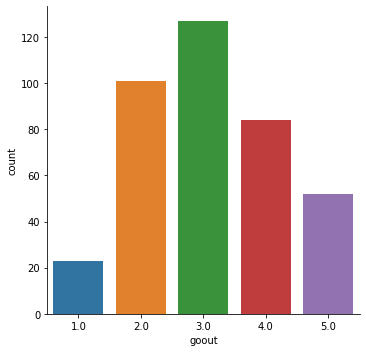

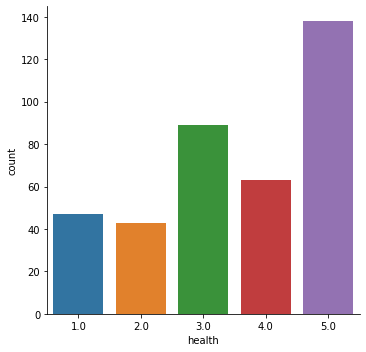

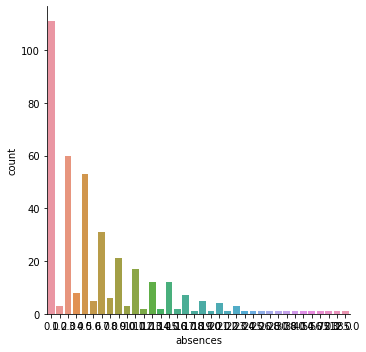

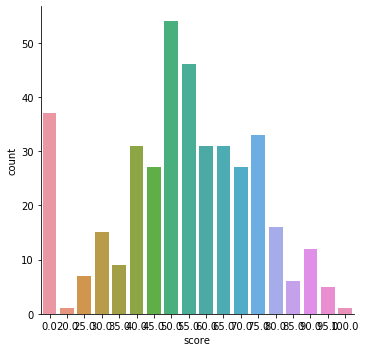

In [24]:
for column in students.columns:
    fig = sns.catplot(x=column, kind="count", data=students)
    plt.show()

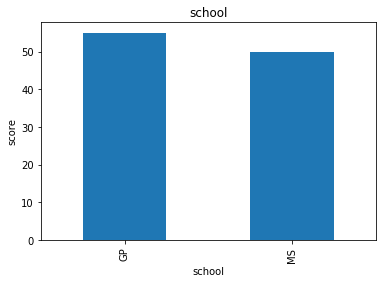

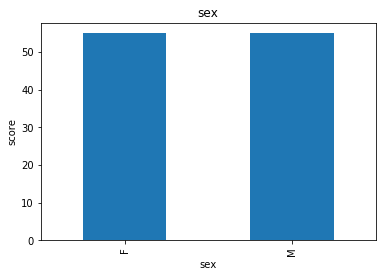

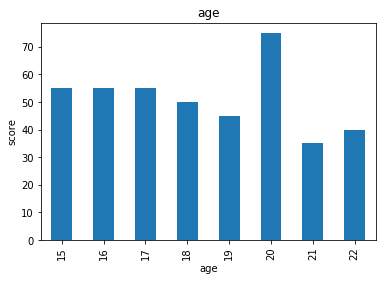

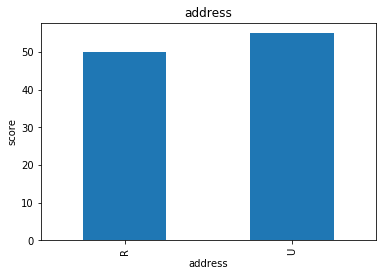

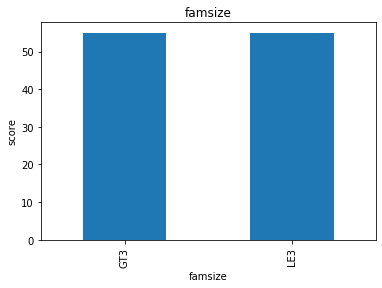

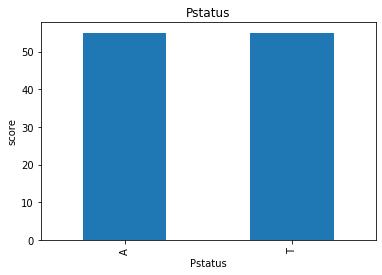

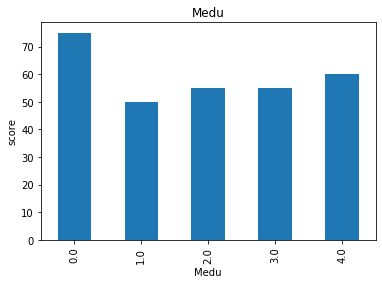

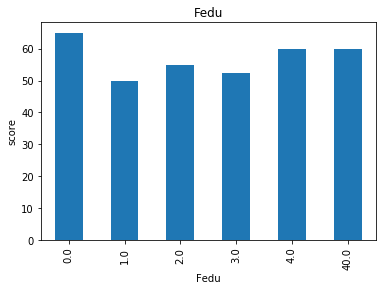

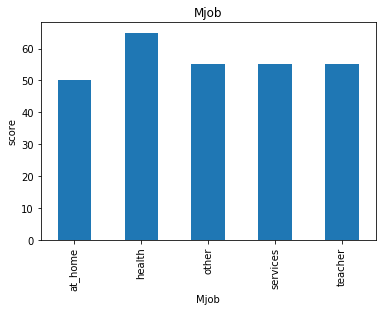

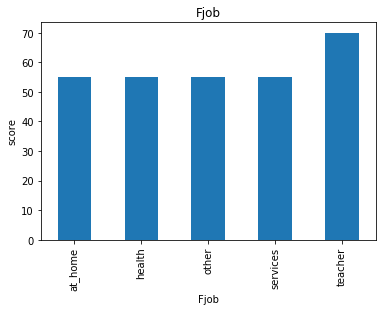

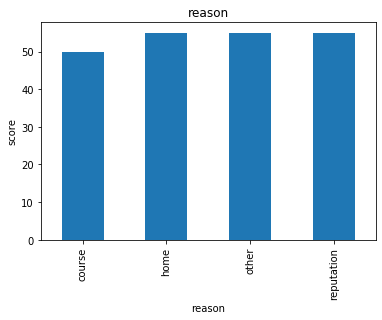

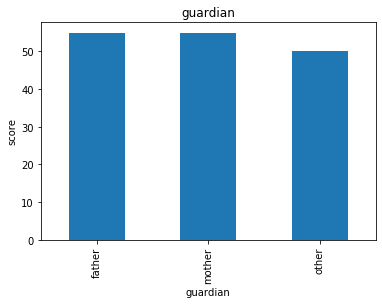

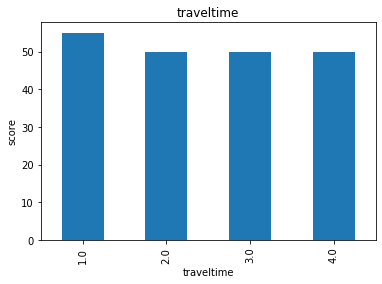

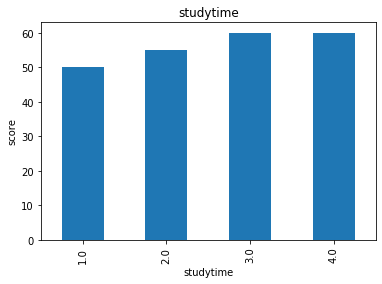

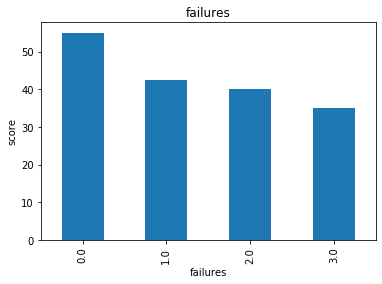

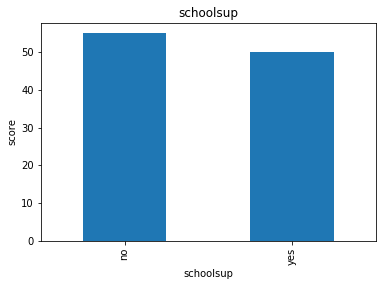

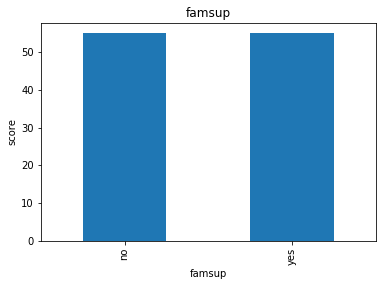

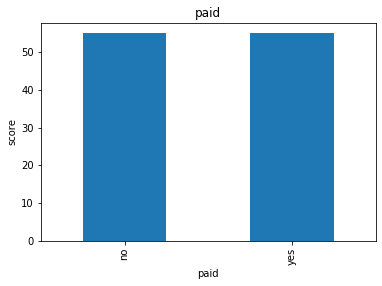

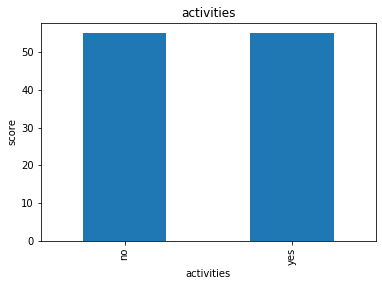

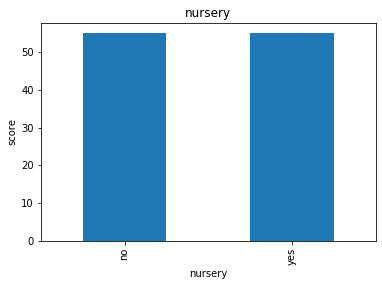

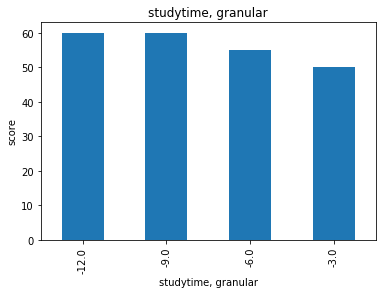

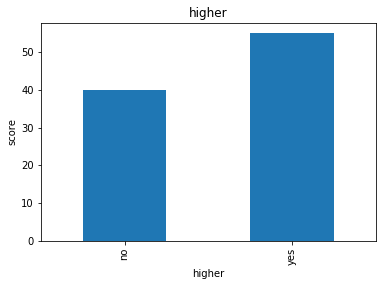

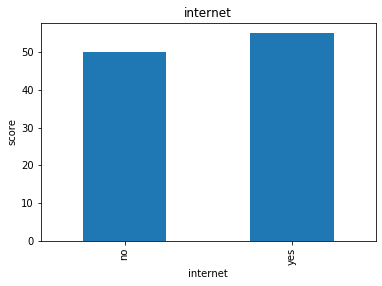

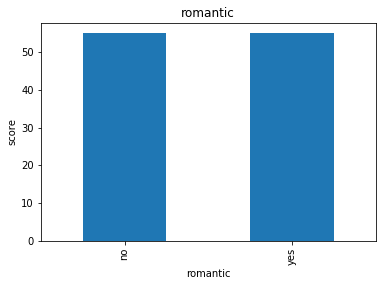

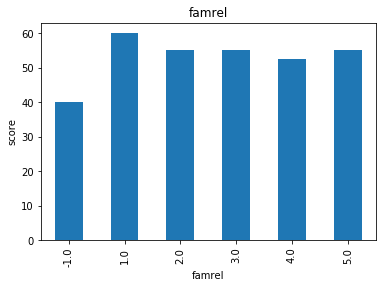

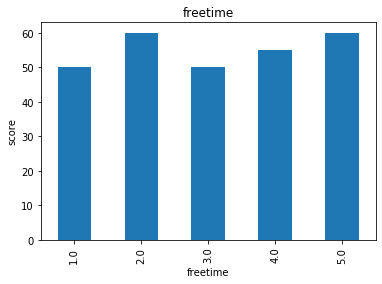

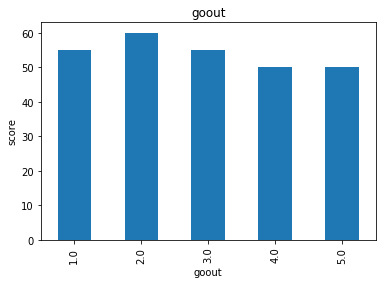

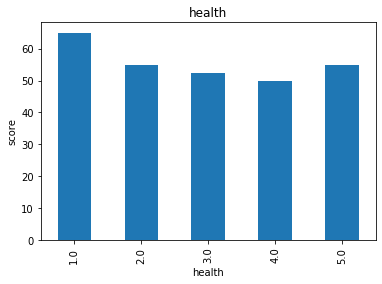

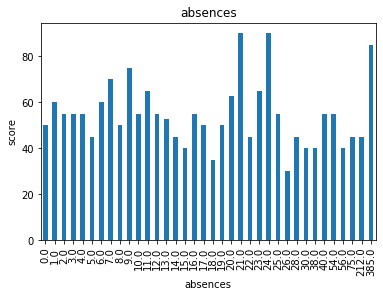

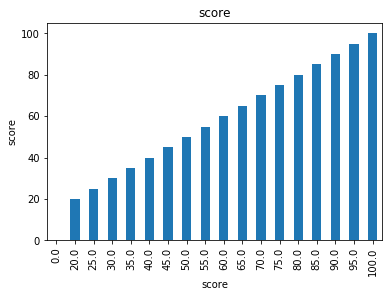

In [27]:
for column in students.columns:
    data=students.copy()
    data.groupby(column)['score'].median().plot.bar()
    plt.xlabel(column)
    plt.ylabel('score')
    plt.title(column)
    plt.show()

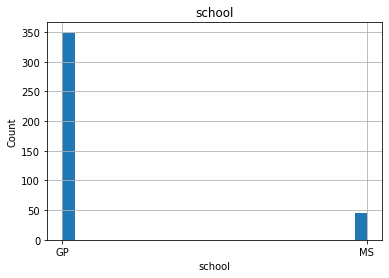

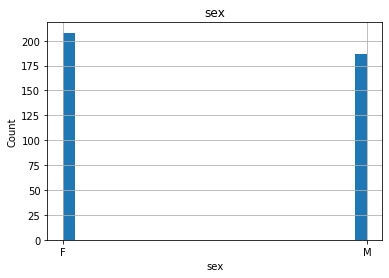

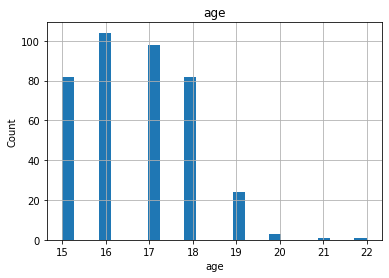

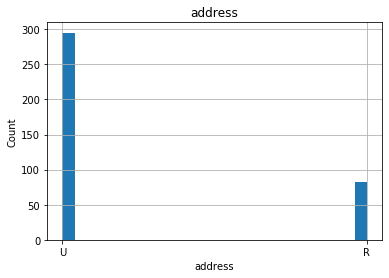

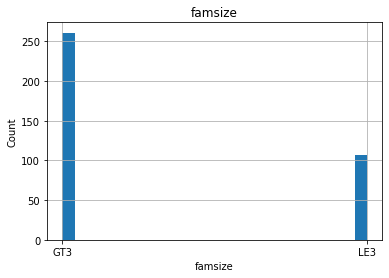

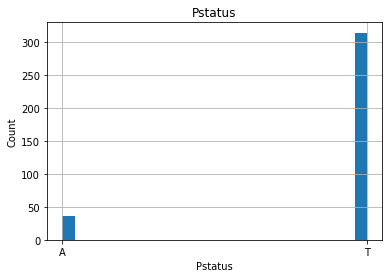

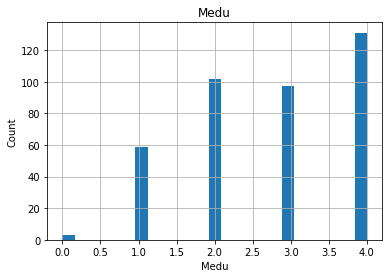

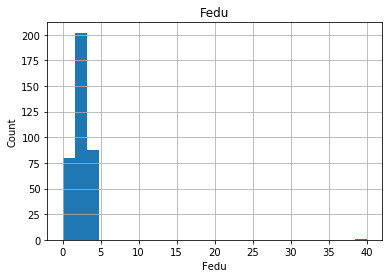

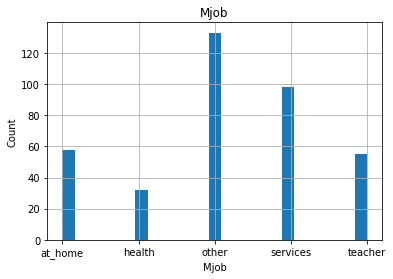

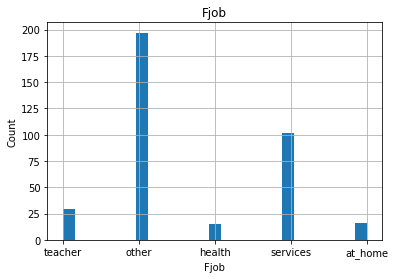

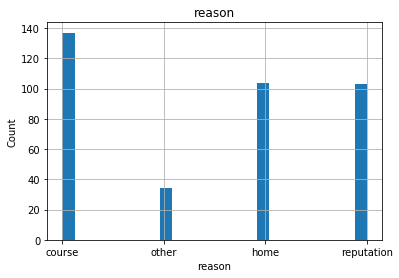

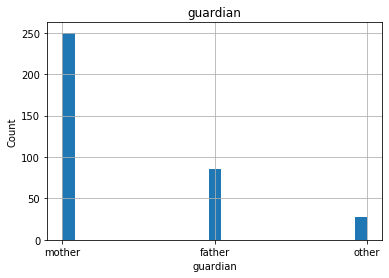

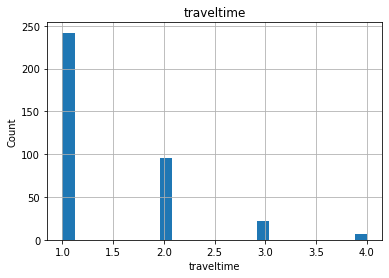

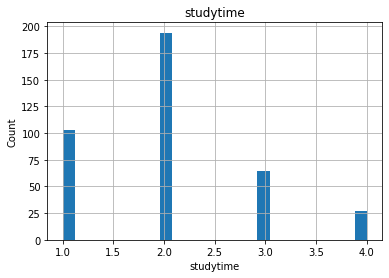

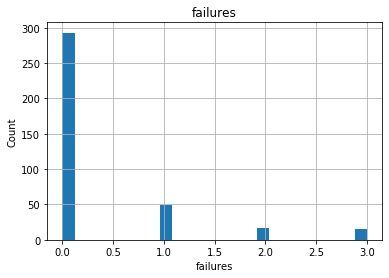

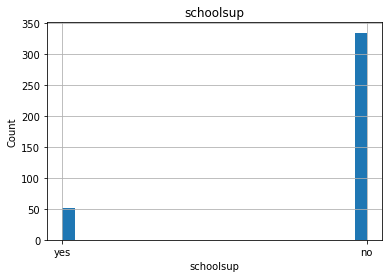

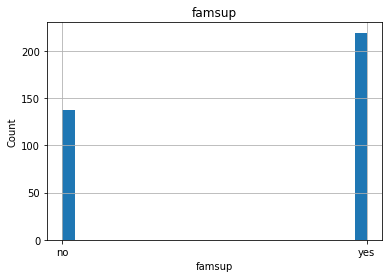

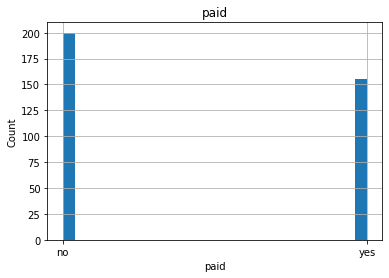

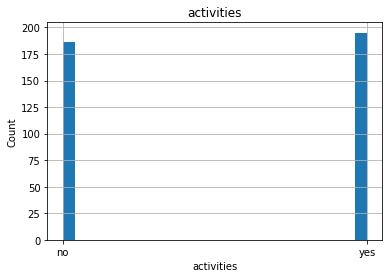

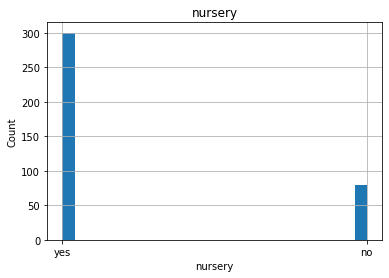

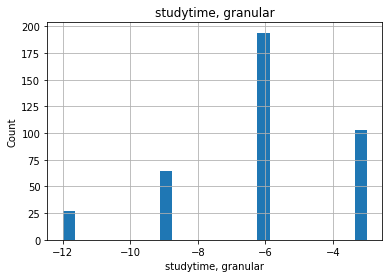

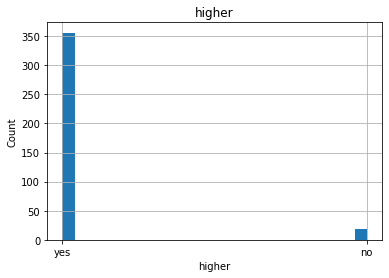

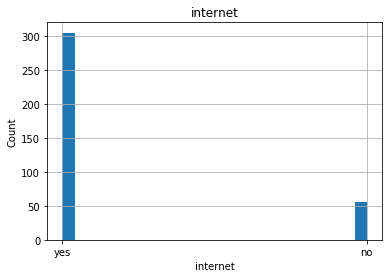

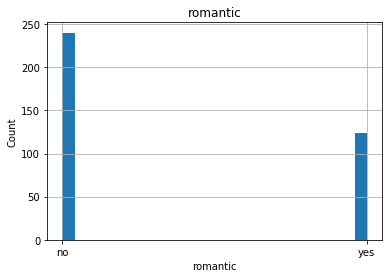

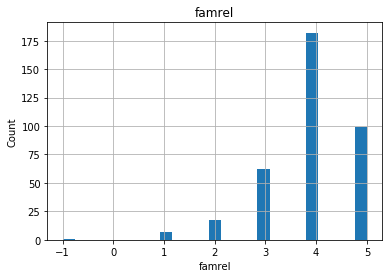

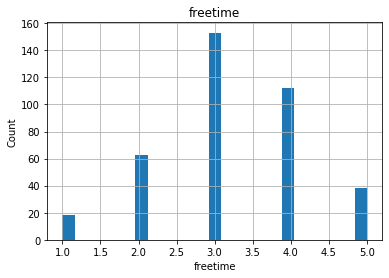

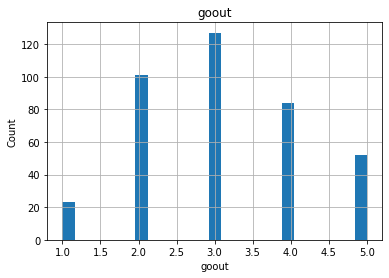

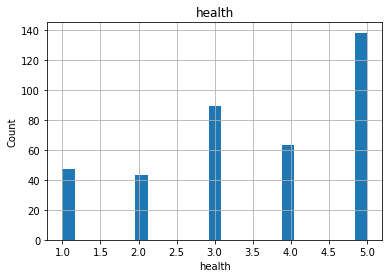

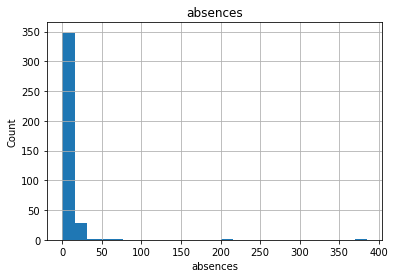

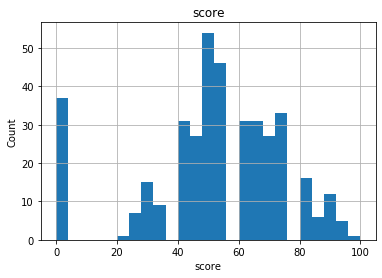

In [31]:
for column in students.columns:
    data=students.copy()
    data[column].hist(bins=25)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(column)
    plt.show()

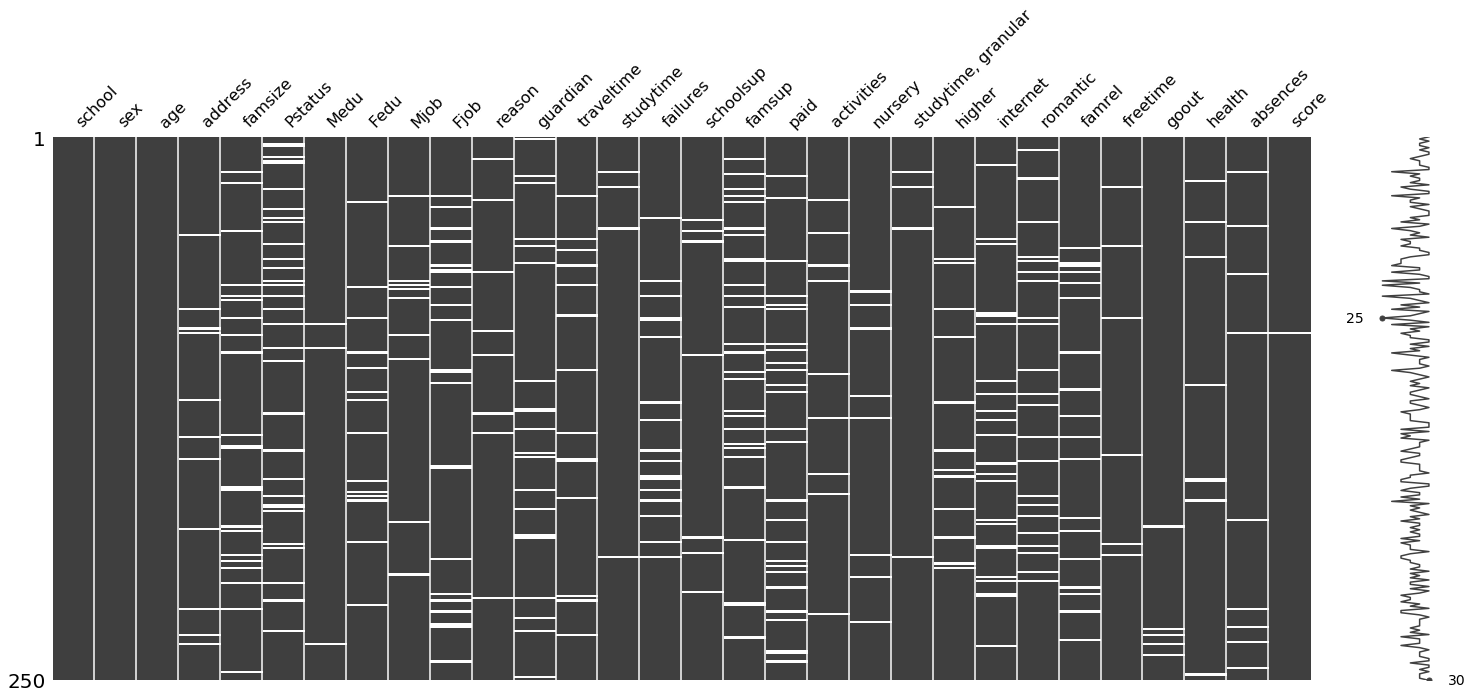

In [3]:
msno.matrix(students.sample(250))

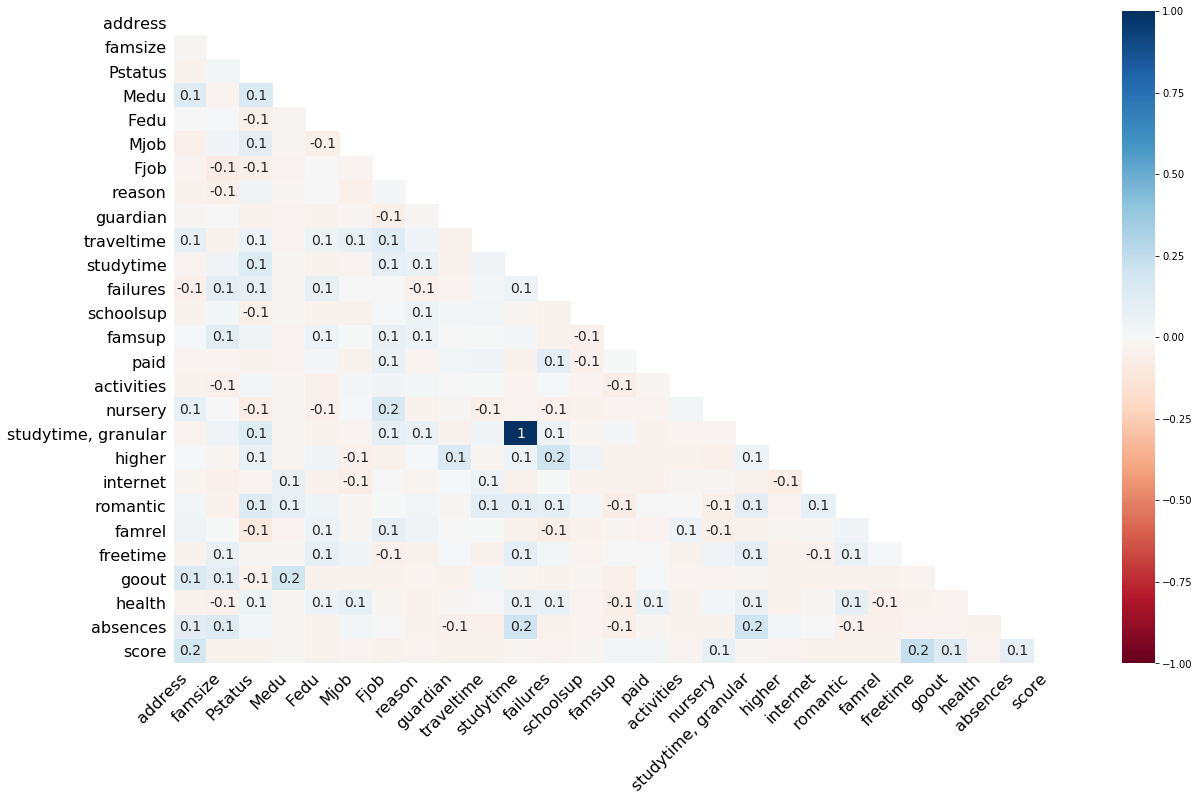

In [4]:
msno.heatmap(students)

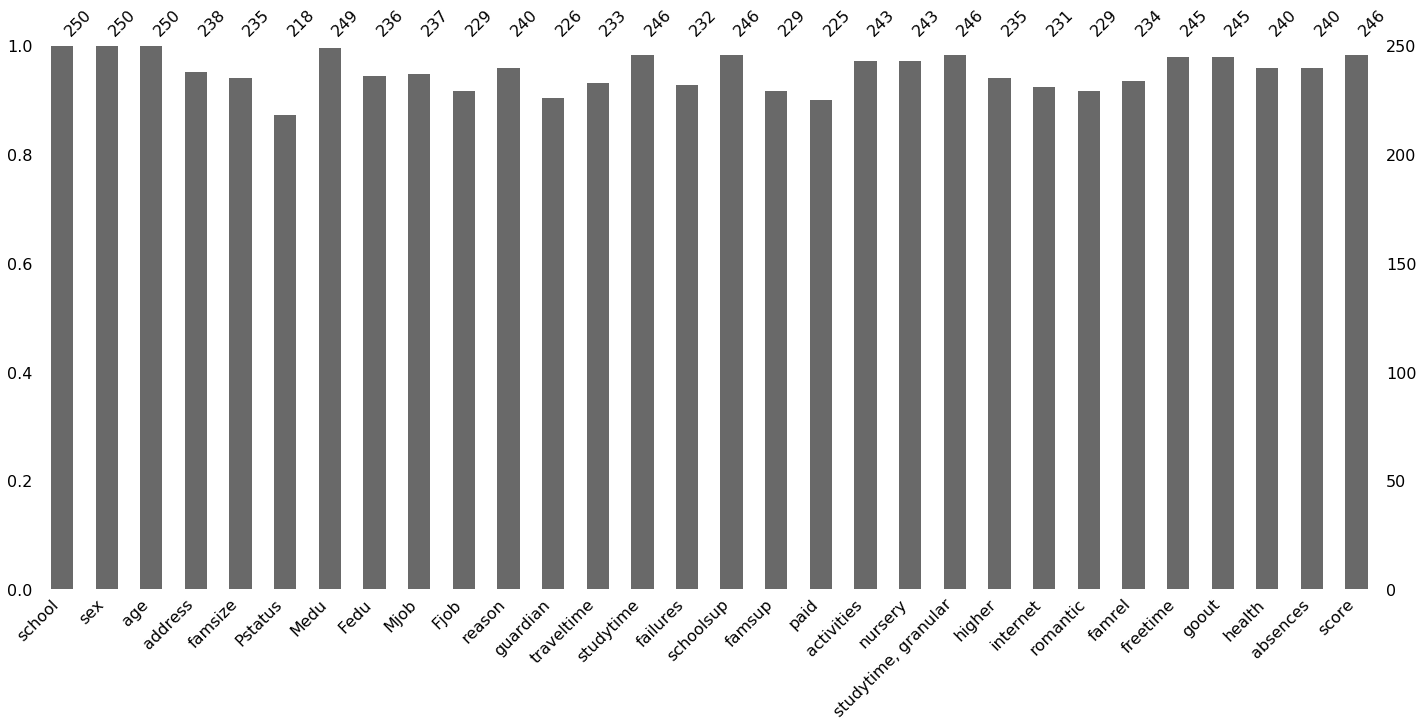

In [7]:
msno.bar(students.sample(250))

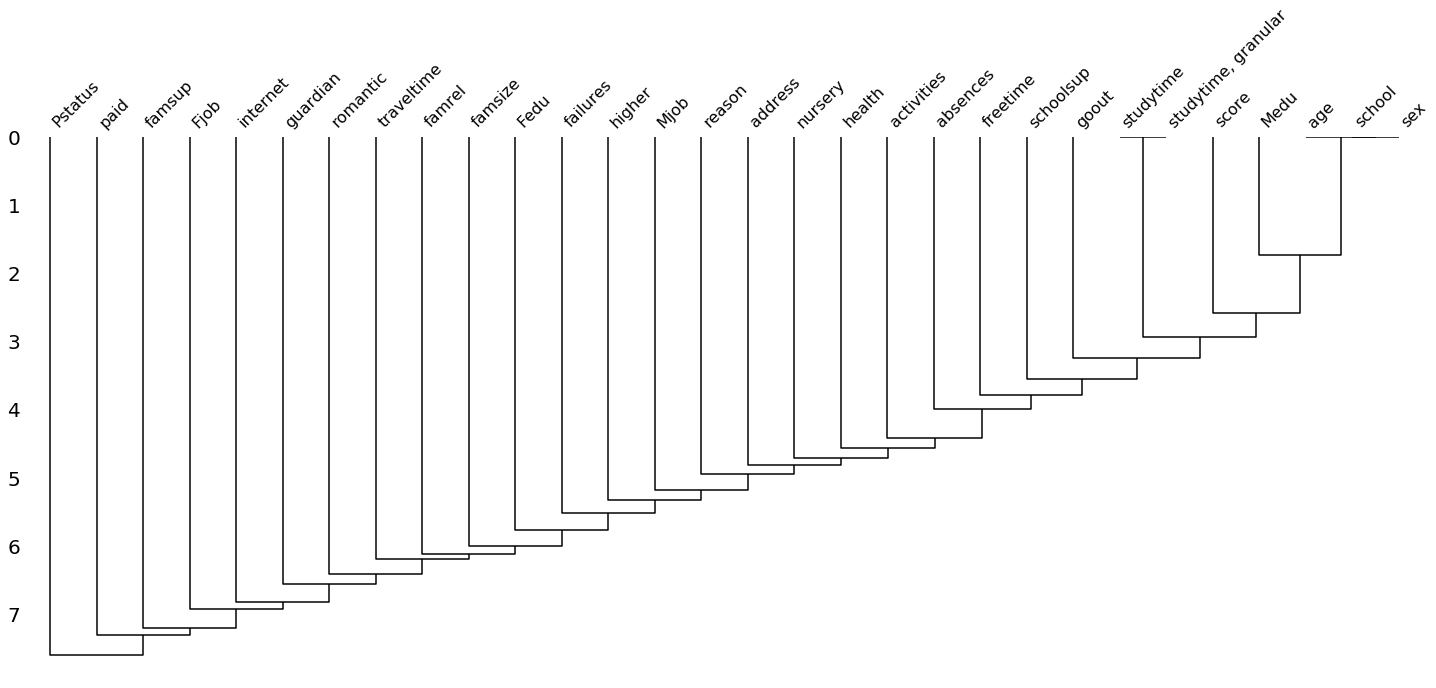

In [8]:
msno.dendrogram(students)

In [9]:
students.skew(), students.kurt()

(age                     0.466270
 Medu                   -0.318855
 Fedu                   12.789061
 traveltime              1.625237
 studytime               0.631385
 failures                2.367033
 studytime, granular    -0.631385
 famrel                 -1.215510
 freetime               -0.157350
 goout                   0.115769
 health                 -0.474784
 absences               12.849727
 score                  -0.736575
 dtype: float64,
 age                     -0.001222
 Medu                    -1.098925
 Fedu                   214.563102
 traveltime               2.363276
 studytime               -0.027036
 failures                 4.937351
 studytime, granular     -0.027036
 famrel                   2.703930
 freetime                -0.299344
 goout                   -0.772618
 health                  -1.034401
 absences               191.234375
 score                    0.403498
 dtype: float64)

In [13]:
students.fillna(method='bfill',inplace=True)

In [14]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   Pstatus              395 non-null    object 
 6   Medu                 395 non-null    float64
 7   Fedu                 395 non-null    float64
 8   Mjob                 395 non-null    object 
 9   Fjob                 395 non-null    object 
 10  reason               394 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    float64
 13  studytime            395 non-null    float64
 14  failures             395 non-null    float64
 15  schoolsup            394 non-null    obj

In [3]:
students.profile_report()

In [4]:
students[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

NameError: name 'numerical' is not defined

In [18]:
for column in students.columns:
    data=students.copy()
    if 0 in data[column].unique():
        pass
    else:
        data[column]=np.log(data[column])
        data.boxplot(column=feature)
        plt.ylabel(column)
        plt.title(column)
        plt.show()


TypeError: Object with dtype category cannot perform the numpy op log

In [7]:
for column in numeric_features:
    print (column,':')
    sf.quantiles_info(students[column])

age :
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].
Medu :
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].
Fedu :
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].
traveltime :
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].
studytime :
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].
failures :
25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].
studytime, granular :
25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].
famrel :
25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].
freetime :
25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].
goout :
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].
health :
25-й перцентиль: 3.0, 7

In [16]:
data.corr().sort_values(by='score')


age      Medu      Fedu  traveltime  studytime  failures  \
failures      0.228047 -0.245463 -0.150821    0.064699  -0.178992  1.000000   
higher_no     0.202123 -0.172251 -0.097113    0.074684  -0.166642  0.268347   
age           1.000000 -0.161704 -0.138018    0.081508  -0.015556  0.228047   
romantic_yes  0.152688  0.020007 -0.024264    0.034760   0.054302  0.097145   
goout         0.135107  0.064164 -0.023282    0.037636  -0.051280  0.120914   
...                ...       ...       ...         ...        ...       ...   
romantic_no  -0.098000 -0.026195  0.031053    0.002375  -0.044724 -0.076848   
Medu         -0.161704  1.000000  0.275598   -0.173515   0.078589 -0.245463   
score        -0.155726  0.213349  0.078573   -0.070559   0.115741 -0.344338   
school_nan         NaN       NaN       NaN         NaN        NaN       NaN   
sex_nan            NaN       NaN       NaN         NaN        NaN       NaN   

              studytime, granular    famrel  freetime     goout    health  \
failures                 0.178992 -0.022655  0.098382  0.120914  0.081284   
higher_no                0.166642 -0.013106  0.047513  0.021323 -0.009467   
age                      0.015556  0.068899  0.029023  0.135107 -0.065946   
romantic_yes            -0.054302 -0.069581 -0.032899  0.004825  0.011160   
goout                    0.051280  0.081154  0.296437  1.000000 -0.015608   
...                           ...       ...       ...       ...       ...   
romantic_no              0.044724  0.049421  0.035176 -0.017455 -0.007201   
Medu                    -0.078589 -0.010050  0.025335  0.064164 -0.045051   
score                   -0.115741  0.057112  0.019026 -0.129685 -0.070460   
school_nan                    NaN       NaN       NaN       NaN       NaN   
sex_nan                       NaN       NaN       NaN       NaN       NaN   

              absences     score  school_GP  school_MS  school_nan     sex_F  \
failures      0.057391 -0.344338  -0.059999   0.059999         NaN -0.040279   
higher_no     0.012037 -0.183924  -0.029040   0.029040         NaN -0.142296   
age           0.093592 -0.155726  -0.377610   0.377610         NaN  0.028606   
romantic_yes  0.005320 -0.136042  -0.060534   0.060534         NaN  0.138798   
goout        -0.048738 -0.129685   0.006257  -0.006257         NaN -0.085922   
...                ...       ...        ...        ...         ...       ...   
romantic_no   0.008532  0.124788   0.047672  -0.047672         NaN -0.097401   
Medu         -0.011944  0.213349   0.133708  -0.133708         NaN -0.080375   
score         0.065283  1.000000   0.044524  -0.044524         NaN -0.099285   
school_nan         NaN       NaN        NaN        NaN         NaN       NaN   
sex_nan            NaN       NaN        NaN        NaN         NaN       NaN   

                 sex_M  sex_nan  address_R  address_U  address_nan  \
failures      0.040279      NaN   0.089158  -0.118539     0.073741   
higher_no     0.142296      NaN   0.058302  -0.032375    -0.047672   
age          -0.028606      NaN   0.137579  -0.152496     0.050553   
romantic_yes -0.138798      NaN   0.012644  -0.007623    -0.009051   
goout         0.085922      NaN  -0.071987   0.022879     0.101032   
...                ...      ...        ...        ...          ...   
romantic_no   0.097401      NaN  -0.005477   0.009056    -0.008408   
Medu          0.080375      NaN  -0.151552   0.131608     0.023511   
score         0.099285      NaN  -0.121377   0.098746     0.035619   
school_nan         NaN      NaN        NaN        NaN          NaN   
sex_nan            NaN      NaN        NaN        NaN          NaN   

              famsize_GT3  famsize_LE3  famsize_nan  ...  guardian_nan  \
failures        -0.003338     0.001668     0.003463  ...      0.117769   
higher_no       -0.038844     0.022713     0.032878  ...     -0.021607   
age             -0.023953     0.020143     0.009466  ...      0.084340   
romantic_yes    -0.045330     0.005034     0.07

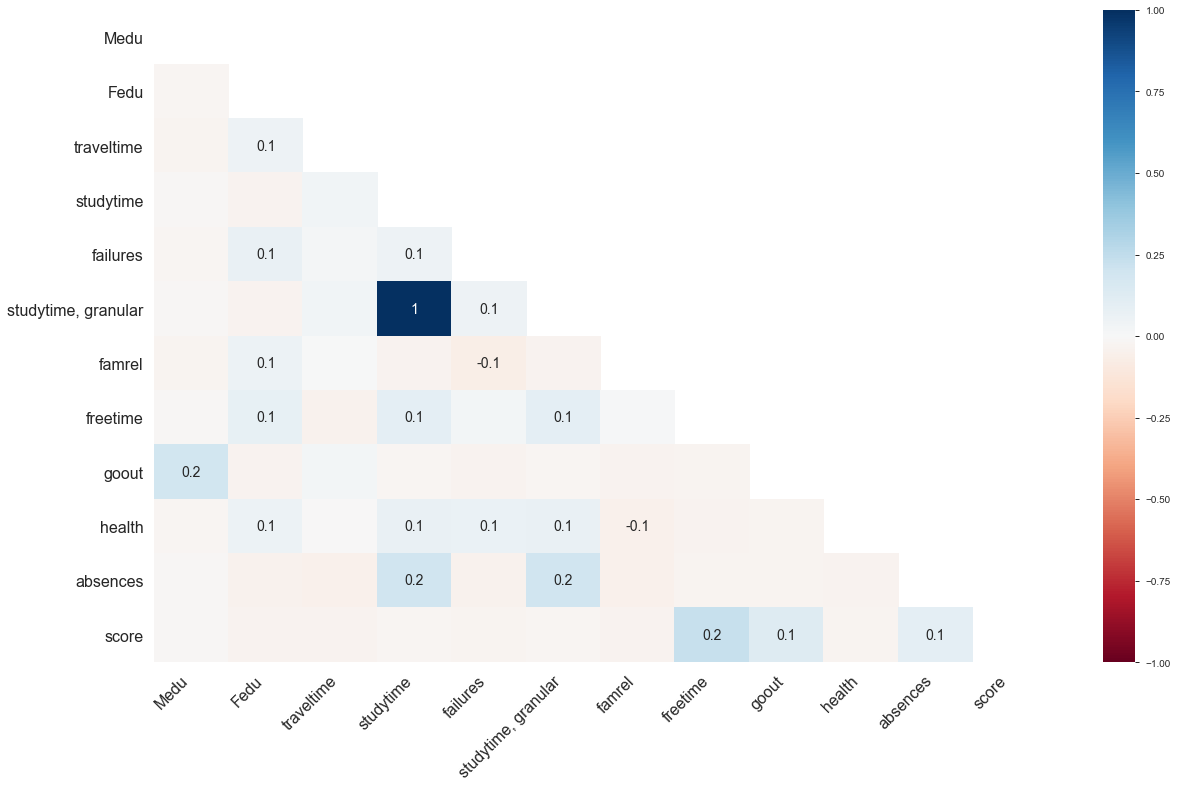

In [17]:
msno.heatmap(data)

In [20]:
object_columns = [s for s in students.columns if students[s].dtypes == 'object']

data = pd.get_dummies(students, columns=object_columns,dtype =float, dummy_na=True)

In [21]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  395 non-null    int64  
 1   Medu                 392 non-null    float64
 2   Fedu                 371 non-null    float64
 3   traveltime           367 non-null    float64
 4   studytime            388 non-null    float64
 5   failures             373 non-null    float64
 6   studytime, granular  388 non-null    float64
 7   famrel               368 non-null    float64
 8   freetime             384 non-null    float64
 9   goout                387 non-null    float64
 10  health               380 non-null    float64
 11  absences             383 non-null    float64
 12  score                389 non-null    float64
 13  school_GP            395 non-null    float64
 14  school_MS            395 non-null    float64
 15  school_nan           395 non-null    flo

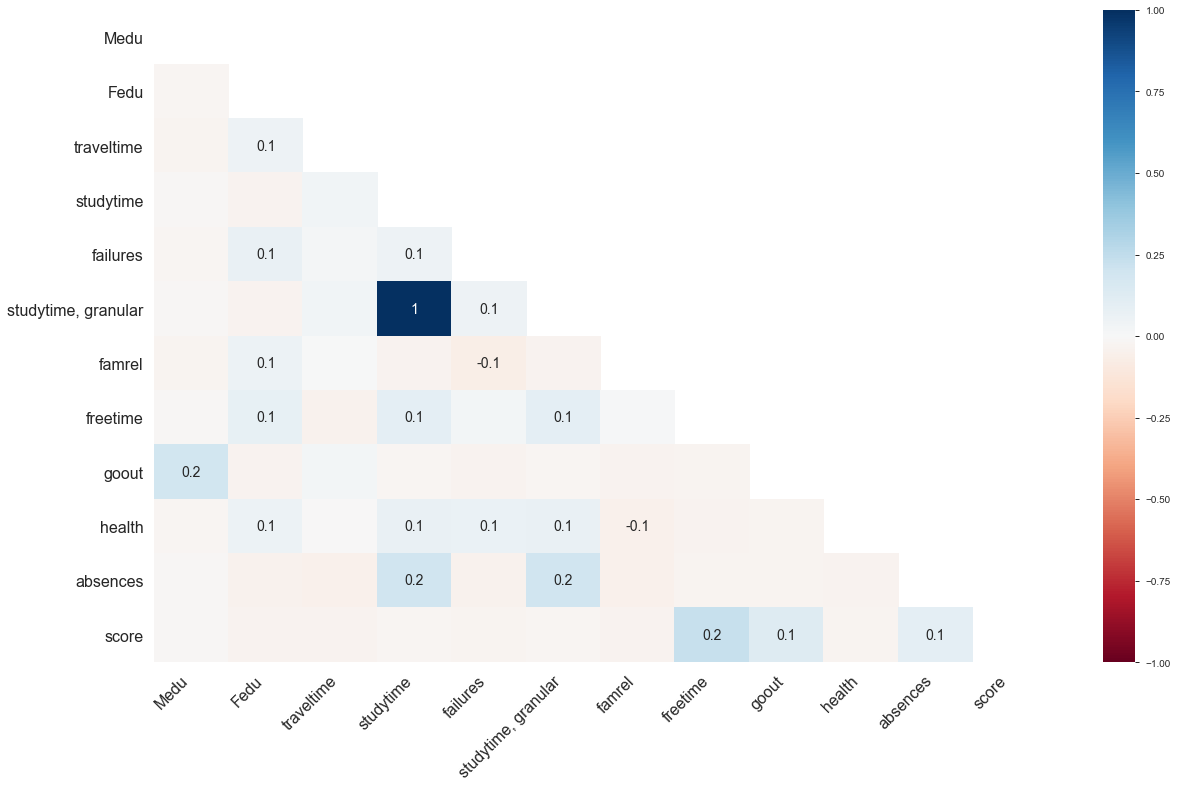

In [23]:
msno.heatmap(data)

In [ ]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

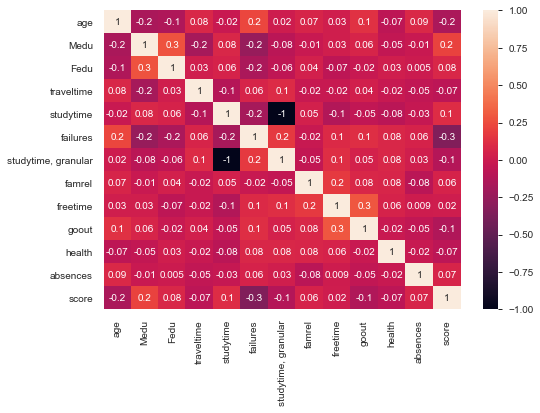

In [25]:
sns.heatmap(students.corr(), annot = True, fmt='.1g')


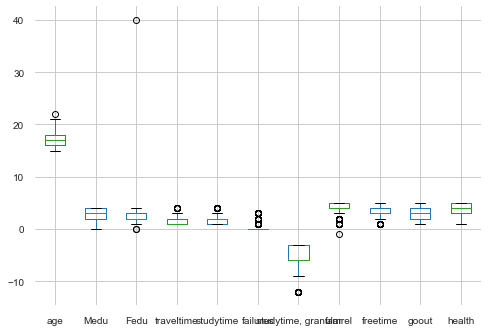

In [63]:


     students.boxplot(column=['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'studytime, granular',
 'famrel',
 'freetime',
 'goout',
 'health'])
#list(numeric_features.columns)